# 기본

In [5]:
# 필요한 라이브러리 설치
!pip install pandas networkx scikit-learn

# 라이브러리 임포트
import pandas as pd
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [9]:
df = pd.read_csv('/content/drive/MyDrive/캡디2/combined_reviews2 - 전체 데이터셋-2.csv')

In [10]:
df = df[df['라벨링'] == 1]

In [11]:
df

,계정 이름,ID,트윗 내용,리포스트 수,작성한 포스트 수,전처리된 트윗,라벨링,전처리된 트윗_문자열,예측된_라벨링,인용_계정,리트윗_계정
0,신상 알려주는 계정,@sinsang_info,테디테일즈 판교 현대백화점 팝업\n 4층 아이코닉 스퀘어\nhttps://teddy...,21,531,"['테디', '테일즈', '판교', '현대', '백화점', '팝업', '아이코닉',...",1,테디 테일즈 판교 현대 백화점 팝업 아이코닉 스퀘어 여러분 이번 팝업 꼬옥 갈다 야...,NaN,NaN,NaN
1,신상 알려주는 계정,@sinsang_info,요즘 핫한 산리오 미니 필름 카메라!\n포챠코 진짜 보자마자 바로 살뻔...\n아니...,11000,531,"['요즘', '산리오', '미니', '필름', '카메라', '포챠코', '진짜', ...",1,요즘 산리오 미니 필름 카메라 포챠코 진짜 보다 바로 살뻔 아니다 하나같이 넘다 기...,NaN,NaN,NaN
2,신상 알려주는 계정,@sinsang_info,일본에서 팔던 환타메론소다 국내판매 시작\n롯데마트에서 살 수 있다고 해요!!\n달...,18000,531,"['일본', '파다', '환타', '메론', '국내', '판매', '롯데', '마트...",1,일본 파다 환타 메론 국내 판매 롯데 마트 달달 메론 맛톡 쏘다 조합 바닐라 아이스...,NaN,NaN,NaN
3,신상 알려주는 계정,@sinsang_info,터치하면 상대방 팔찌에 진동이 가는 우정 팔찌\n어디에 떨어져있던 거리가 멀어도 된...,12000,531,"['터치', '상대방', '팔찌', '진동', '가다', '우정', '팔찌', '어...",1,터치 상대방 팔찌 진동 가다 우정 팔찌 어디 떨어지다 거리 멀다 되다 온라인 에서만...,NaN,NaN,NaN
4,신상 알려주는 계정,@sinsang_info,성심당 망고시루 실사..... \n여름 한정으로 나왔고 저 빵도 정말 맛있지만\n생...,19000,531,"['성심당', '망고', '시루', '실사', '여름', '한정', '나오다', '...",1,성심당 망고 시루 실사 여름 한정 나오다 정말 맛있다 망고 그냥 폭발 들어가다,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4364,sou,@sappipii,인앤아웃 마스크팩<\n \n 모공에 있는 피지 배출해준다해서\n \n 공구할 때 싸...,6,"2,594","['인앤아웃', '마스크', '모공', '피지', '배출', '해주다', '다해',...",1,인앤아웃 마스크 모공 피지 배출 해주다 다해 공구 싸다 사다 마스크 팩임 확실하다 ...,NaN,없음,없음
4365,sou,@sappipii,점심은 그냥 일반식 먹었고\n \n 저녁은 보통 다즐샵 도시락 먹었어요\n \n 가...,6,"2,594","['점심', '그냥', '일반', '먹다', '저녁', '보통', '도시락', '먹...",1,점심 그냥 일반 먹다 저녁 보통 도시락 먹다 가격 저렴하다 메뉴 다양하다 무난 맛있...,NaN,없음,없음
4366,sou,@sappipii,운동 개싫어 인간으로서..\n \n 유튜브에 다노티비 누워서 하는 운동 추천합니다\...,6,"2,594","['운동', '싫다', '인간', '으로서', '유튜브', '달다', '티비', '...",1,운동 싫다 인간 으로서 유튜브 달다 티비 눕다 운동 추천 그리고 롤러 해주다 롤러 ...,NaN,없음,없음
4367,sou,@sappipii,사실 전 운동을 빡세게 한게 아니다보니까 이게 효과가 컸을 것 같아요\n \n 와사...,6,"2,594","['사실', '운동', '빡세', '아니다', '니까', '효과', '크다', '같...",1,사실 운동 빡세 아니다 니까 효과 크다 같다 와사비 다이어트 점심 먹다 챙기다 먹다...,NaN,없음,없음


# **네트워크 분석**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np

# 데이터프레임에서 '없음'을 NaN으로 변환
df.replace('없음', np.nan, inplace=True)


전체 노드 수: 205
전체 엣지 수: 1242

중요 노드 중심성 데이터프레임:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54645 (\N{HANGUL SYLLABLE HAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

        account_id  degree_centrality  betweenness_centrality  pagerank  \
0          @3bLA89           0.225490                0.083418  0.018559   
1        @forblue_           0.200980                0.021565  0.014353   
2       @bab_10000           0.161765                0.020501  0.018251   
3         @il_lite           0.318627                0.071511  0.032125   
4          @yex_n1           0.210784                0.028955  0.019321   
5         @nyauxuo           0.250000                0.095470  0.019652   
6       @v2nc0uver           0.245098                0.075011  0.028316   
7        @im_andim           0.235294                0.035732  0.016343   
8      @youuth0340           0.151961                0.010468  0.009747   
9      @parkkodeok           0.161765                0.028755  0.009381   
10    @kitty112929           0.205882                0.041671  0.014395   
11  @coscrazy_Girl           0.274510                0.042315  0.027973   
12      @pinkmoxhi       

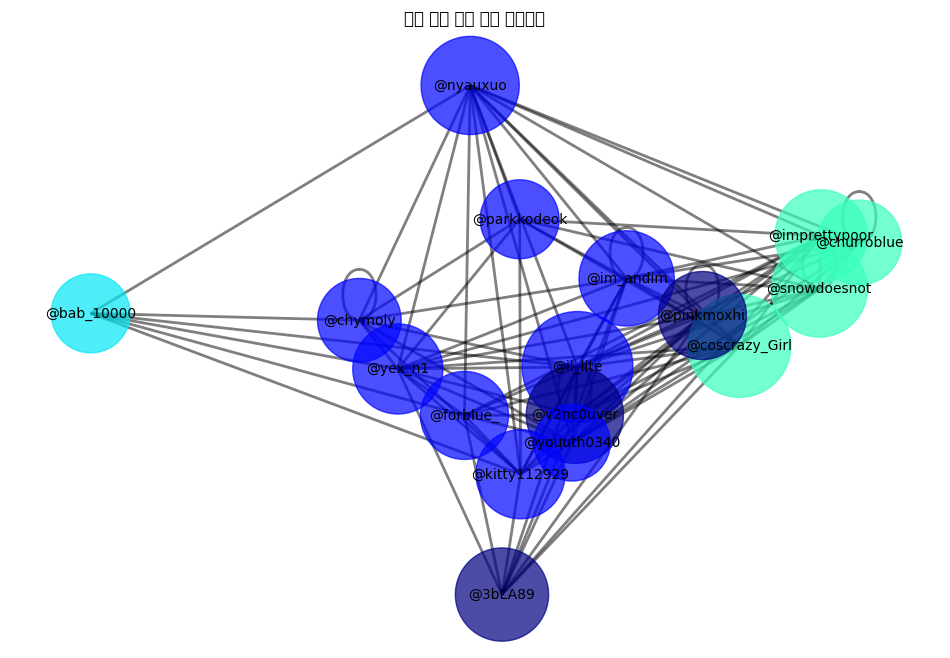

핵심 불법 트윗을 리트윗하는 계정 목록:
{'@3bLA89': 0.22549019607843138, '@forblue_': 0.20098039215686275, '@bab_10000': 0.16176470588235295, '@il_lite': 0.31862745098039214, '@yex_n1': 0.2107843137254902, '@nyauxuo': 0.25, '@v2nc0uver': 0.24509803921568626, '@im_andim': 0.23529411764705882, '@youuth0340': 0.15196078431372548, '@parkkodeok': 0.16176470588235295, '@kitty112929': 0.20588235294117646, '@coscrazy_Girl': 0.27450980392156865, '@pinkmoxhi': 0.20098039215686275, '@imprettypoor': 0.22058823529411764, '@snowdoesnot': 0.24019607843137256, '@chymoly': 0.18137254901960784, '@churroblue': 0.18627450980392157}


In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 초기화
G = nx.Graph()

# 노드와 엣지 추가
for _, row in df.iterrows():
    # '라벨링'이 1인 경우에만 불법 계정으로 간주하여 추가
    if pd.isna(row['ID']) or pd.isna(row['라벨링']) or row['라벨링'] != 1:
        continue

    G.add_node(row['ID'], label=row['라벨링'])

    # 리트윗 계정 추가
    if pd.notna(row['리트윗_계정']):
        retweet_accounts = [acc.strip() for acc in row['리트윗_계정'].split(',')]
        for retweet_account in retweet_accounts:
            G.add_edge(row['ID'], retweet_account, weight=G.get_edge_data(row['ID'], retweet_account, default={'weight': 0})['weight'] + 1)

        # 리트윗한 계정끼리의 엣지 추가
        for i in range(len(retweet_accounts)):
            for j in range(i + 1, len(retweet_accounts)):
                if retweet_accounts[i] != retweet_accounts[j]:
                    G.add_edge(retweet_accounts[i], retweet_accounts[j], weight=G.get_edge_data(retweet_accounts[i], retweet_accounts[j], default={'weight': 0})['weight'] + 1)

    # 인용 계정 추가
    if pd.notna(row['인용_계정']):
        quote_accounts = [acc.strip() for acc in row['인용_계정'].split(',')]
        for quote_account in quote_accounts:
            G.add_edge(row['ID'], quote_account, weight=G.get_edge_data(row['ID'], quote_account, default={'weight': 0})['weight'] + 1)

        # 인용 계정들끼리의 엣지 추가
        for i in range(len(quote_accounts)):
            for j in range(i + 1, len(quote_accounts)):
                if quote_accounts[i] != quote_accounts[j]:
                    G.add_edge(quote_accounts[i], quote_accounts[j], weight=G.get_edge_data(quote_accounts[i], quote_accounts[j], default={'weight': 0})['weight'] + 1)

# 그래프 정보 출력
print("전체 노드 수:", len(G.nodes))
print("전체 엣지 수:", len(G.edges))

# 중심성 계산
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

# 중심성의 임계값 설정 및 필터링
degree_threshold = 0.15
important_nodes = [node for node, centrality in degree_centrality.items() if centrality > degree_threshold]
important_edges = [(u, v) for u, v in G.edges if u in important_nodes and v in important_nodes]

# 커뮤니티 감지 (예: Louvain 방법 사용)
from community import community_louvain
partition = community_louvain.best_partition(G)
community_labels = {node: partition[node] for node in G.nodes()}

# 중요 노드의 중심성을 기반으로 한 데이터프레임 생성
results_df = pd.DataFrame({
    'account_id': important_nodes,
    'degree_centrality': [degree_centrality[node] for node in important_nodes],
    'betweenness_centrality': [betweenness_centrality[node] for node in important_nodes],
    'pagerank': [pagerank[node] for node in important_nodes],
    'community': [community_labels[node] for node in important_nodes]
})

print("\n중요 노드 중심성 데이터프레임:")
print(results_df)

# 커뮤니티별로 색상 매핑
unique_communities = list(set(community_labels.values()))
community_colors = {community: plt.cm.jet(i / len(unique_communities)) for i, community in enumerate(unique_communities)}

# 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# 중요 노드 색상 설정 (커뮤니티별로 색상 지정)
node_colors = [community_colors[community_labels[node]] for node in important_nodes]
sizes = [20000 * degree_centrality[node] for node in important_nodes]  # 중심성에 따라 크기 조절

# 필터링된 노드 및 엣지 그리기
nx.draw_networkx_nodes(G, pos, nodelist=important_nodes, node_size=sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=important_edges, width=2, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={node: node for node in important_nodes}, font_size=10)

plt.title("핵심 불법 트윗 전파 네트워크")
plt.axis('off')
plt.show()

# 불법 트윗을 리트윗하는 계정 목록 출력
illegal_retweeters = {node: degree_centrality[node] for node in important_nodes}
print("핵심 불법 트윗을 리트윗하는 계정 목록:")
print(illegal_retweeters)


In [15]:
# 전체 노드 중심성 데이터프레임 생성
results_df = pd.DataFrame({
    'account_id': list(G.nodes()),
    'degree_centrality': [degree_centrality[node] for node in G.nodes()],
    'betweenness_centrality': [betweenness_centrality[node] for node in G.nodes()],
    'pagerank': [pagerank[node] for node in G.nodes()],
    'community': [community_labels[node] for node in G.nodes()]
})

print("\n전체 노드 중심성 데이터프레임:")
results_df



전체 노드 중심성 데이터프레임:


,account_id,degree_centrality,betweenness_centrality,pagerank,community
0,@sinsang_info,0.044118,0.000721,0.002395,11
1,@3bLA89,0.225490,0.083418,0.018559,0
2,@__sulhyang,0.127451,0.004385,0.007750,4
3,@xxxzgu,0.117647,0.021689,0.007755,4
4,@yu1_1n,0.147059,0.010548,0.008523,4
...,...,...,...,...,...
200,@sakaoii,0.014706,0.000163,0.001757,0
201,@of313_,0.009804,0.000000,0.001715,13
202,@blueinwavess,0.009804,0.000000,0.001715,13
203,\n@babymoomoomin,0.004902,0.000000,0.000966,13


In [16]:
import networkx as nx

# 각 노드의 Degree 계산
degree_dict = dict(G.degree())

# Degree 출력
for node, degree in degree_dict.items():
    print(f"노드 {node}: Degree = {degree}")


노드 @sinsang_info: Degree = 9
노드 @3bLA89: Degree = 46
노드 @__sulhyang: Degree = 26
노드 @xxxzgu: Degree = 24
노드 @yu1_1n: Degree = 30
노드 @forblue_: Degree = 41
노드 @manduuuu__u: Degree = 25
노드 @bab_10000: Degree = 33
노드 @yeobeun__ii: Degree = 19
노드 @BOBOB_911: Degree = 25
노드 @il_lite: Degree = 65
노드 @psyche1102: Degree = 18
노드 @suzu_kiring: Degree = 9
노드 @yex_n1: Degree = 43
노드 @mongsilXmu: Degree = 13
노드 @nyauxuo: Degree = 51
노드 @rozearozy: Degree = 28
노드 @gghhh2131: Degree = 27
노드 @d00_xxc3: Degree = 22
노드 @hitnrunwh: Degree = 22
노드 @v2nc0uver: Degree = 50
노드 @im_andim: Degree = 48
노드 @theonly_o_ne: Degree = 24
노드 @damgooom: Degree = 28
노드 @youuth0340: Degree = 31
노드 @parkkodeok: Degree = 33
노드 @Thewar2021: Degree = 1
노드 @hichi660493: Degree = 1
노드 @SoriView: Degree = 3
노드 @slowlywinter10: Degree = 2
노드 @euni0205: Degree = 1
노드 @lusidval: Degree = 5
노드 @youucrazy_: Degree = 8
노드 @bambbbang_: Degree = 13
노드 @sanseey_: Degree = 9
노드 @okas_ia: Degree = 19
노드 @kitty112929: Degree = 42
노드 @eat_

In [17]:
import pandas as pd

# Degree 값을 데이터프레임에 추가
results_df['AdRetweetCount'] = results_df['account_id'].map(degree_dict)

print("\nDegree가 추가된 데이터프레임:")
results_df



Degree가 추가된 데이터프레임:


,account_id,degree_centrality,betweenness_centrality,pagerank,community,AdRetweetCount
0,@sinsang_info,0.044118,0.000721,0.002395,11,9
1,@3bLA89,0.225490,0.083418,0.018559,0,46
2,@__sulhyang,0.127451,0.004385,0.007750,4,26
3,@xxxzgu,0.117647,0.021689,0.007755,4,24
4,@yu1_1n,0.147059,0.010548,0.008523,4,30
...,...,...,...,...,...,...
200,@sakaoii,0.014706,0.000163,0.001757,0,3
201,@of313_,0.009804,0.000000,0.001715,13,2
202,@blueinwavess,0.009804,0.000000,0.001715,13,2
203,\n@babymoomoomin,0.004902,0.000000,0.000966,13,1


In [30]:
train_df=pd.read_csv('/content/drive/MyDrive/캡디2/combined_reviews2 - 트레인셋(네트워크).csv')
test_df=pd.read_csv('/content/drive/MyDrive/캡디2/combined_reviews2 - 테스트셋(네트워크).csv')

In [31]:
# 'ID'를 기준으로 df와 results_df를 합칩니다.
train_df = pd.merge(train_df, results_df, how='left', left_on='ID', right_on='account_id')
test_df = pd.merge(test_df, results_df, how='left', left_on='ID', right_on='account_id')

# 결과 출력
print(train_df.head())
print(test_df.head())



        계정 이름                                              트윗 내용  리포스트 수  \
0  신상 알려주는 계정  테디테일즈 판교 현대백화점 팝업\n 4층 아이코닉 스퀘어\nhttps://teddy...      21   
1  신상 알려주는 계정  요즘 핫한 산리오 미니 필름 카메라!\n포챠코 진짜 보자마자 바로 살뻔...\n아니...   11000   
2  신상 알려주는 계정  일본에서 팔던 환타메론소다 국내판매 시작\n롯데마트에서 살 수 있다고 해요!!\n달...   18000   
3  신상 알려주는 계정  터치하면 상대방 팔찌에 진동이 가는 우정 팔찌\n어디에 떨어져있던 거리가 멀어도 된...   12000   
4  신상 알려주는 계정  성심당 망고시루 실사..... \n여름 한정으로 나왔고 저 빵도 정말 맛있지만\n생...   19000   

   답글 제한 여부 작성한 포스트 수                                            전처리된 트윗  라벨링  \
0         0       531  ['테디', '테일즈', '판교', '현대', '백화점', '팝업', '아이코닉',...    1   
1         0       531  ['요즘', '산리오', '미니', '필름', '카메라', '포챠코', '진짜', ...    1   
2         0       531  ['일본', '파다', '환타', '메론', '국내', '판매', '롯데', '마트...    1   
3         0       531  ['터치', '상대방', '팔찌', '진동', '가다', '우정', '팔찌', '어...    1   
4         0       531  ['성심당', '망고', '시루', '실사', '여름', '한정', '나오다', '...    1   

                                         전처리된 트윗_문자열  예측

In [32]:
test_df

,계정 이름,트윗 내용,리포스트 수,답글 제한 여부,작성한 포스트 수,전처리된 트윗,라벨링,전처리된 트윗_문자열,예측된_라벨링,0,1,ID,account_id,degree_centrality,betweenness_centrality,pagerank,community,AdRetweetCount
0,ひ..,눅스 핸드크림 평소에 만원 넘는게 지금 딱 2500원에 무료배송입니다\n \n 바르...,7,0,545,"['눅스', '핸드', '크림', '평소', '만원', '넘다', '지금', '무료...",1,눅스 핸드 크림 평소 만원 넘다 지금 무료 배송 바르다 나서다 거리 않다 깔끔하다 ...,1.0,901.0,901.0,@zxlkhs_,@zxlkhs_,0.000000,0.000000,0.000805,1.0,0.0
1,ひ..,아니 이런거 왜 추석 다지나고 보이냐고 엄빠선물로 홍삼에만 12만원 썻는데 진짜 눔...,12,0,545,"['아니다', '이렇다', '추석', '다지다', '보이다', '엄빠', '선물',...",1,아니다 이렇다 추석 다지다 보이다 엄빠 선물 홍삼 에만 만원 썻는데 진짜 눔물 만원...,1.0,901.0,901.0,@zxlkhs_,@zxlkhs_,0.000000,0.000000,0.000805,1.0,0.0
2,ひ..,아니 입벌구ㅋㅋㅋㅋㅋㅋ\n \n 미라클모닝 이거는 진짜 구라 아님\n \n 다들 독...,1,0,545,"['아니다', '벌다', '미라클', '모닝', '진짜', '구라', '아니다', ...",1,아니다 벌다 미라클 모닝 진짜 구라 아니다 들다 독기 그득하다 자가 진단 오다,1.0,901.0,901.0,@zxlkhs_,@zxlkhs_,0.000000,0.000000,0.000805,1.0,0.0
3,ひ..,후기)파우치만 집에 20개 있는 사람 드디어 인생 파우치를 찾다\n \n 여기에 아...,13,0,545,"['후기', '파우치', '사람', '드디어', '인생', '파우치', '찾다', ...",1,후기 파우치 사람 드디어 인생 파우치 찾다 여기 아이패드 넣다 다니다 분개,1.0,901.0,901.0,@zxlkhs_,@zxlkhs_,0.000000,0.000000,0.000805,1.0,0.0
4,ひ..,에어팟 프로가 만원이라고요…? 알리가 또…\n \n \n \n 100% 선착순 진행...,46,0,545,"['에어팟', '프로', '만원', '이라', '고요', '알리', '\r\r ',...",1,에어팟 프로 만원 이라 고요 알리 선착순 진행 매일 맞추다 빨리 들어가다 말고도 만...,1.0,901.0,901.0,@zxlkhs_,@zxlkhs_,0.000000,0.000000,0.000805,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,9.5,📍 라운드랩 자작나무 수분 선크림\n \n 선크림 매일 발라야하는데 미백 있는건 매...,0,0,2만,"['라운드', '자작나무', '수분', '선크림', '선크림', '매일', '발라'...",1,라운드 자작나무 수분 선크림 선크림 매일 발라 야하다 미백 매일 바르다 조금 부담스...,1.0,901.0,901.0,@yu1_1n,@yu1_1n,0.147059,0.010548,0.008523,4.0,30.0
1798,9.5,📍 메디필 레드 락토 콜라겐 랩핑 마스크\n \n 유난히 피부가 건조하게 느껴지는 ...,0,0,2만,"['메다', '레드', '락토', '콜라겐', '랩핑', '마스크', '유난히', ...",1,메다 레드 락토 콜라겐 랩핑 마스크 유난히 피부 건조하다 느껴지다 쓰다 마스크 앰플...,1.0,901.0,901.0,@yu1_1n,@yu1_1n,0.147059,0.010548,0.008523,4.0,30.0
1799,9.5,📍 디마르3 시그니처 에스투드 프로텍터 앰플\n \n 모공 때문에 피부화장 다 망치...,0,0,2만,"['마르', '에스', '투드', '프로', '텍터', '앰플', '모공', '때문...",1,마르 에스 투드 프로 텍터 앰플 모공 때문 피부 화장 망치다 사람 제발 써다 보다 ...,1.0,901.0,901.0,@yu1_1n,@yu1_1n,0.147059,0.010548,0.008523,4.0,30.0
1800,9.5,📍 닥터지 레드 블레미쉬 클리어 수딩 크림\n \n 이건 제일 무난템! 매일 써도 ...,0,0,2만,"['닥터', '레드', '레미', '클리어', '수딩', '크림', '이건', '제...",1,닥터 레드 레미 클리어 수딩 크림 이건 제일 무난 매일 써다 괜찮다 수분크림 쓰다 ...,NaN,901.0,901.0,@yu1_1n,@yu1_1n,0.147059,0.010548,0.008523,4.0,30.0


In [33]:
# merged_df 전체의 NaN 값 개수 확인
nan_counts = train_df.isna().sum()
print("전체 열의 NaN 값 개수:\n", nan_counts)

# 특정 열의 NaN 값 확인 (예: degree_centrality, betweenness_centrality, pagerank)
nan_specific_columns = train_df[['degree_centrality', 'betweenness_centrality', 'pagerank','AdRetweetCount']].isna().sum()
print("특정 열의 NaN 값 개수:\n", nan_specific_columns)


전체 열의 NaN 값 개수:
 계정 이름                        0
트윗 내용                        0
리포스트 수                       0
답글 제한 여부                     0
작성한 포스트 수                    0
전처리된 트윗                      0
라벨링                          0
전처리된 트윗_문자열                  0
예측된_라벨링                   1455
ID                           1
Unnamed: 10               7208
account_id                 339
degree_centrality          339
betweenness_centrality     339
pagerank                   339
community                  339
AdRetweetCount             339
dtype: int64
특정 열의 NaN 값 개수:
 degree_centrality         339
betweenness_centrality    339
pagerank                  339
AdRetweetCount            339
dtype: int64


In [34]:

# 여러 열의 NaN 값을 0으로 변환
train_df[['degree_centrality', 'betweenness_centrality', 'pagerank', 'community','AdRetweetCount']] = train_df[['degree_centrality', 'betweenness_centrality', 'pagerank', 'community','AdRetweetCount']].fillna(0)
test_df[['degree_centrality', 'betweenness_centrality', 'pagerank', 'community','AdRetweetCount']] = test_df[['degree_centrality', 'betweenness_centrality', 'pagerank', 'community','AdRetweetCount']].fillna(0)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# **네트워크 모델링 (최적의 모델 저장 - 코드 돌릴 때마다 변동 주의)**

---



In [ ]:
pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00


In [24]:
import pandas as pd
train_df= pd.read_csv('/content/drive/MyDrive/캡디2/train for networK.csv')
test_df= pd.read_csv('/content/drive/MyDrive/캡디2/test for networK2.csv')

In [ ]:
# 각 노드의 degree 계산
degree_dict = dict(G.degree())

# 각 엣지에 가중치 부여 (엣지 가중치는 연결된 노드의 degree 합으로 설정)
for u, v in G.edges():
    G[u][v]['weight'] = degree_dict[u] + degree_dict[v]

# PageRank 계산 (엣지 가중치를 반영)
pagerank = nx.pagerank(G, weight='weight')


In [35]:
# PageRank 계산 (기본)
pagerank = nx.pagerank(G)
# 최종 중요도 계산: PageRank 값과 Degree 값을 결합
final_importance = {node: pagerank[node] * degree_dict[node] for node in G.nodes()}

# 결과 출력
print(final_importance)


{'@sinsang_info': 0.021556356520732567, '@3bLA89': 0.8537261285547202, '@__sulhyang': 0.2014940420994537, '@xxxzgu': 0.1861174369653357, '@yu1_1n': 0.2556912456731709, '@forblue_': 0.5884618782826575, '@manduuuu__u': 0.2781973469274676, '@bab_10000': 0.6022856904398214, '@yeobeun__ii': 0.09030561586170831, '@BOBOB_911': 0.25409304731147386, '@il_lite': 2.0881417949943497, '@psyche1102': 0.09531449827293098, '@suzu_kiring': 0.028616450999585295, '@yex_n1': 0.8308084289084838, '@mongsilXmu': 0.05033816630258899, '@nyauxuo': 1.0022774040295368, '@rozearozy': 0.2724463317141496, '@gghhh2131': 0.29804181699555543, '@d00_xxc3': 0.144812160360014, '@hitnrunwh': 0.15770452902028592, '@v2nc0uver': 1.4158049257682805, '@im_andim': 0.784446708201272, '@theonly_o_ne': 0.19812862890001215, '@damgooom': 0.28078048938085437, '@youuth0340': 0.3021606045525069, '@parkkodeok': 0.30956306269219847, '@Thewar2021': 0.001013978358547515, '@hichi660493': 0.001013978358547515, '@SoriView': 0.01001220437648088

In [ ]:
test_df.to_csv('test for networK 명제추가.csv', index=False, encoding='utf-8')

In [36]:
# final_importance 값을 데이터프레임에 추가
train_df['Centrality Rank'] = train_df['account_id'].map(final_importance)
test_df['Centrality Rank'] = test_df['account_id'].map(final_importance)



In [37]:
train_df

,계정 이름,트윗 내용,리포스트 수,답글 제한 여부,작성한 포스트 수,전처리된 트윗,라벨링,전처리된 트윗_문자열,예측된_라벨링,ID,Unnamed: 10,account_id,degree_centrality,betweenness_centrality,pagerank,community,AdRetweetCount,Centrality Rank
0,신상 알려주는 계정,테디테일즈 판교 현대백화점 팝업\n 4층 아이코닉 스퀘어\nhttps://teddy...,21,0,531,"['테디', '테일즈', '판교', '현대', '백화점', '팝업', '아이코닉',...",1,테디 테일즈 판교 현대 백화점 팝업 아이코닉 스퀘어 여러분 이번 팝업 꼬옥 갈다 야...,NaN,@sinsang_info,NaN,@sinsang_info,0.044118,0.000721,0.002395,11.0,9.0,0.021556
1,신상 알려주는 계정,요즘 핫한 산리오 미니 필름 카메라!\n포챠코 진짜 보자마자 바로 살뻔...\n아니...,11000,0,531,"['요즘', '산리오', '미니', '필름', '카메라', '포챠코', '진짜', ...",1,요즘 산리오 미니 필름 카메라 포챠코 진짜 보다 바로 살뻔 아니다 하나같이 넘다 기...,NaN,@sinsang_info,NaN,@sinsang_info,0.044118,0.000721,0.002395,11.0,9.0,0.021556
2,신상 알려주는 계정,일본에서 팔던 환타메론소다 국내판매 시작\n롯데마트에서 살 수 있다고 해요!!\n달...,18000,0,531,"['일본', '파다', '환타', '메론', '국내', '판매', '롯데', '마트...",1,일본 파다 환타 메론 국내 판매 롯데 마트 달달 메론 맛톡 쏘다 조합 바닐라 아이스...,NaN,@sinsang_info,NaN,@sinsang_info,0.044118,0.000721,0.002395,11.0,9.0,0.021556
3,신상 알려주는 계정,터치하면 상대방 팔찌에 진동이 가는 우정 팔찌\n어디에 떨어져있던 거리가 멀어도 된...,12000,0,531,"['터치', '상대방', '팔찌', '진동', '가다', '우정', '팔찌', '어...",1,터치 상대방 팔찌 진동 가다 우정 팔찌 어디 떨어지다 거리 멀다 되다 온라인 에서만...,NaN,@sinsang_info,NaN,@sinsang_info,0.044118,0.000721,0.002395,11.0,9.0,0.021556
4,신상 알려주는 계정,성심당 망고시루 실사..... \n여름 한정으로 나왔고 저 빵도 정말 맛있지만\n생...,19000,0,531,"['성심당', '망고', '시루', '실사', '여름', '한정', '나오다', '...",1,성심당 망고 시루 실사 여름 한정 나오다 정말 맛있다 망고 그냥 폭발 들어가다,NaN,@sinsang_info,NaN,@sinsang_info,0.044118,0.000721,0.002395,11.0,9.0,0.021556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,yulgyo..,오페라 립틴트 :: 코랄핑크\n \n 길게 설명안써도 고트인거 보이시죠\n 백...,26,0,"4,087","['오페라', '틴트', '코랄', '핑크', '길다', '설명', '쓰다', '고...",0,오페라 틴트 코랄 핑크 길다 설명 쓰다 고트 인거 보이시 백화점 질감 좋아하다 오페...,0.0,@kimyulgyo_,NaN,@kimyulgyo_,0.058824,0.000312,0.002991,13.0,12.0,0.035897
7208,yulgyo..,캔메이크 글로우 플로어 치크\n ::B02 로즈발레리나 \n \n 쉬머펄이 들...,22,0,"4,087","['메이크', '로우', '플로', '크다', '발레리나', '쉬머펄', '들어가다...",0,메이크 로우 플로 크다 발레리나 쉬머펄 들어가다 살짝 뮤트 블러셔 완전 도중 채도 ...,0.0,@kimyulgyo_,NaN,@kimyulgyo_,0.058824,0.000312,0.002991,13.0,12.0,0.035897
7209,yulgyo..,나스:: 멜로즈\n \n 핑크+골드펄의 바세린광 조합•••\n 오랜 위시였는데...,15,0,"4,087","['나스', '멜로', '핑크', '골드', '바세린', '조합', '오랜', '위...",0,나스 멜로 핑크 골드 바세린 조합 오랜 위시 얻다 되어다 기쁘다 역시 곱다 곱다 이...,0.0,@kimyulgyo_,NaN,@kimyulgyo_,0.058824,0.000312,0.002991,13.0,12.0,0.035897
7210,yulgyo..,질스튜어트 사쿠라 부케 립 세럼::\n 105 cherry\n \n 입술에 얼...,27,0,"4,087","['스튜어트', '사쿠라', '부케', '입술', '얼음', '결정', '올리다',...",0,스튜어트 사쿠라 부케 입술 얼음 결정 올리다 같다 아이 시한 표현 가능하다 엄청 크...,0.0,@kimyulgyo_,NaN,@kimyulgyo_,0.058824,0.000312,0.002991,13.0,12.0,0.035897


In [38]:
from sklearn.metrics import accuracy_score, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
from transformers import AutoTokenizer, AutoModel
# 학습에 필요한 특성 및 라벨 정의
X_train = train_df[['betweenness_centrality', 'community','Centrality Rank','AdRetweetCount']]
y_train = train_df['라벨링']
X_test = test_df[['betweenness_centrality','community','Centrality Rank','AdRetweetCount']]
y_test = test_df['라벨링']

# 쉼표 제거, 숫자 변환, NaN 값 0으로 변환
X_train = X_train.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce').fillna(0)

# TabNet 모델 초기화 및 학습
clf = TabNetClassifier(n_d=64, n_a=64, n_steps=5, gamma=1.5, lambda_sparse=1e-3)


clf.fit(
    X_train.values, y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_metric=['accuracy'],
    max_epochs=40,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

# 예측 및 평가
y_pred = clf.predict(X_test.values)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.73645 | val_0_accuracy: 0.37424 | val_1_accuracy: 0.49612 |  0:00:03s
epoch 1  | loss: 0.75226 | val_0_accuracy: 0.48835 | val_1_accuracy: 0.51609 |  0:00:06s
epoch 2  | loss: 0.58665 | val_0_accuracy: 0.46201 | val_1_accuracy: 0.5394  |  0:00:09s
epoch 3  | loss: 0.57032 | val_0_accuracy: 0.48586 | val_1_accuracy: 0.51998 |  0:00:12s
epoch 4  | loss: 0.55437 | val_0_accuracy: 0.51082 | val_1_accuracy: 0.59656 |  0:00:14s
epoch 5  | loss: 0.53114 | val_0_accuracy: 0.55602 | val_1_accuracy: 0.5899  |  0:00:17s
epoch 6  | loss: 0.52826 | val_0_accuracy: 0.62632 | val_1_accuracy: 0.58158 |  0:00:19s
epoch 7  | loss: 0.52296 | val_0_accuracy: 0.60524 | val_1_accuracy: 0.59267 |  0:00:22s
epoch 8  | loss: 0.51883 | val_0_accuracy: 0.60136 | val_1_accuracy: 0.53663 |  0:00:25s
epoch 9  | loss: 0.5151  | val_0_accuracy: 0.61134 | val_1_accuracy: 0.53663 |  0:00:27s
epoch 10 | loss: 0.51123 | val_0_accuracy: 0.62465 | val_1_accuracy: 0.56049 |  0:00:30s
epoch 11 | loss: 0.51

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.6176470588235294
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       901
           1       0.64      0.55      0.59       901

    accuracy                           0.62      1802
   macro avg       0.62      0.62      0.62      1802
weighted avg       0.62      0.62      0.62      1802



In [42]:
import numpy as np
X_test = test_df[['betweenness_centrality', 'community','Centrality Rank','AdRetweetCount']]
X_test = X_test.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce').fillna(0)
# 예측 수행
predictions = clf.predict(X_test.values)

In [43]:
# 예측 결과를 DataFrame에 추가
test_df['예측2'] = predictions

# 결과 확인
print(test_df[['라벨링', '예측2']])

      라벨링  예측2
0       1    1
1       1    1
2       1    1
3       1    1
4       1    1
...   ...  ...
1797    1    1
1798    1    1
1799    1    1
1800    1    1
1801    1    1

[1802 rows x 2 columns]


성능 보고서:
              precision    recall  f1-score   support

     class_0       0.60      0.69      0.64       901
     class_1       0.64      0.55      0.59       901

    accuracy                           0.62      1802
   macro avg       0.62      0.62      0.62      1802
weighted avg       0.62      0.62      0.62      1802



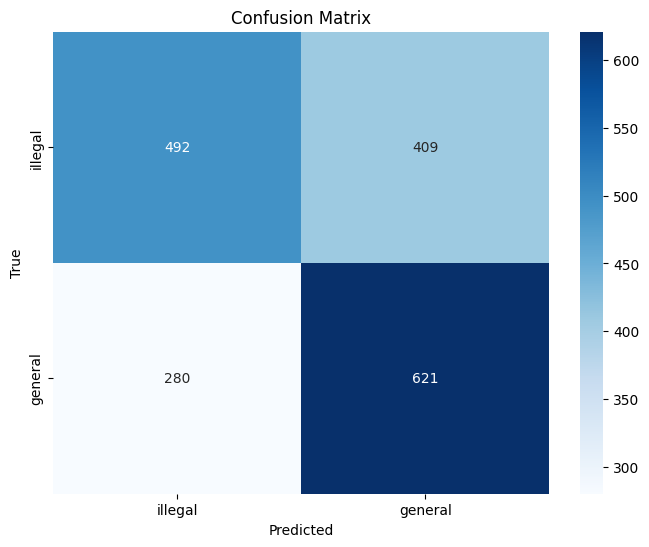

In [44]:
from sklearn.utils import *
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd

print("성능 보고서:")
report = classification_report(test_df['라벨링'], test_df['예측2'], target_names=['class_0', 'class_1'])
print(report)

# 혼동 행렬 계산
cm = confusion_matrix(test_df['라벨링'], test_df['예측2'])

# 혼동 행렬의 0과 1의 위치를 바꿔서 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm[::-1, ::-1], annot=True, fmt='d', cmap='Blues', xticklabels=['illegal', 'general'], yticklabels=['illegal', 'general'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


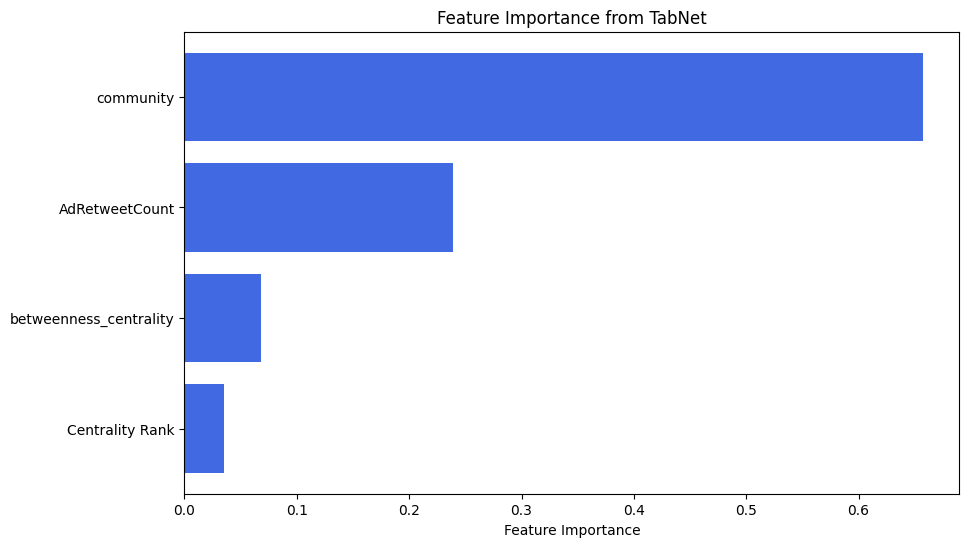

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도 추출
feature_importances = clf.feature_importances_

# 특성 이름 (X_train.columns는 특성의 이름을 포함하는 배열입니다)
feature_names = X_train.columns

# 특성 중요도를 내림차순으로 정렬
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from TabNet')
plt.gca().invert_yaxis()  # 중요한 특성이 위로 오도록 설정
plt.show()

In [ ]:
# TabNet 모델 저장
clf.save_model("tabnet_model_명제추가")  # 모델 저장


Successfully saved model at tabnet_model_명제추가.zip


'tabnet_model_명제추가.zip'